# DAT 203 - Lab Assignment #6

- Author: Colin Bowers
- Date: Jun 17, 2023

**Instructions**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 

**Instructions**
1. Upload Titanic dataset 
1. Define Survived column as TARGET variable 
1. Select ALL  features that can be predictive of the survival status
1. Transform ALL Possible  categorical features with Dummy values 
1. Import Decision Tree function, train and test function from sklearn library 
1. Apply Decision Tree on the split train/test dataset  and report the accuracy 
1. Part II
    1. Change and expand the possible parameters and the number of cv for the hyper-parameter tuning
    1. Report feature importance using “feature_importances_” attribute
    1. Report the best features according to the decision tree using n_features_ attribute
    1. Compute your model’s confusion matrix, accuracy, and f1-score. 

**1 - Upload Titanic dataset**

In [2]:
df = pd.read_csv("data/Titanic_original.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q


**2 - Define Survived column as TARGET variable**

In [3]:
target = 'Survived'

**3 - Select ALL features that can be predictive of the survival status**

In [4]:
predictors = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [5]:
# To reduce column count, let's use PassengerId as the index
df.set_index("PassengerId", inplace=True)

# Logistic Regression requires numeric variables so we should drop these
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [6]:
# Replace missing values of Age to be the median
median = df["Age"].median()
df.fillna({'Age': median}, inplace=True)

**4 - Transform ALL Possible categorical features with Dummy values**

In [7]:
# for the columns that are categorical, convert them and create dummies for each
dummies = ['Embarked', 'Sex']
for d in dummies:
    df[d] = df[d].astype('category')

dummy_data = pd.get_dummies(df[dummies])
df2 = pd.concat([df, dummy_data], axis=1)
df2.drop(dummies, axis=1, inplace=True)

In [8]:
# Add the new dummy fields to the list of predictors 
predictors.remove("Embarked")
predictors.remove("Sex")
predictors += ["Embarked_C", "Embarked_Q", "Embarked_S", "Sex_female", "Sex_male" ]

**5 - Import Decision Tree function, train and test function from sklearn library**

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

**6 - Apply Decision Tree on the split train/test dataset and report the accuracy**

In [10]:
# split the data into training (80%) and test (20%)
train, test = train_test_split(df2, test_size=0.2)

X_train = train[predictors]
y_train = train[target]

X_test = test[predictors]
y_test = test[target]


In [11]:
model = DecisionTreeClassifier(random_state=0)
model = model.fit(X_train, y_train)

In [12]:
# check accuracy with TRAINING data
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       433
           1       0.99      0.96      0.97       279

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [13]:
# check accuracy with TEST data
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       116
           1       0.73      0.81      0.77        63

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



In [14]:
mat = metrics.confusion_matrix(y_pred, y_test)
print(mat)

[[97 12]
 [19 51]]


In [15]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(
#    model, 
#    feature_names= predictors,  
#    class_names = target,
#    filled = True
#)

## Part II

In [16]:
#Use the following code to perform hyper-parameter tuning for the decision tree.

from sklearn.model_selection import GridSearchCV
#from sklearn import tree

clf = tree.DecisionTreeClassifier()
parameters = {
    'max_features': ['log2', 'sqrt'], 
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10], 
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}
grid_obj = GridSearchCV(clf, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [17]:
best_params = grid_obj.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [18]:
model2 = grid_obj.best_estimator_
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
score2 = metrics.accuracy_score(y_test, y_pred2)
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       116
           1       0.66      0.30      0.41        63

    accuracy                           0.70       179
   macro avg       0.68      0.61      0.61       179
weighted avg       0.69      0.70      0.66       179



In [19]:
print(f"Accuracy improved by: {score2-score:.4f}")

Accuracy improved by: -0.1285


**7 - Change and expand the possible parameters and the number of cv for the hyper-parameter tuning**

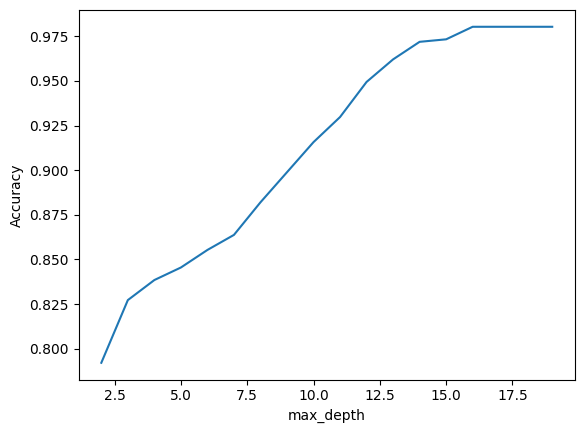

CPU times: user 428 ms, sys: 180 ms, total: 608 ms
Wall time: 307 ms


In [20]:
%%time
################ Explore Max Depth ################

depth_range = range(2, 20)
accuracy = [ ]

for d in depth_range:
    m = tree.DecisionTreeClassifier(max_depth=d, random_state=0)
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    accuracy.append(score)
    
plt.plot(depth_range, accuracy, "-")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

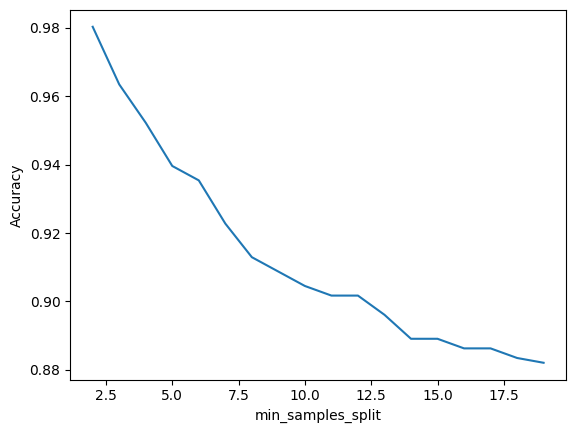

CPU times: user 341 ms, sys: 182 ms, total: 524 ms
Wall time: 261 ms


In [21]:
%%time
################ Explore min_samples_split ################

split_range = range(2, 20)
accuracy = [ ]

for s in split_range:
    m = tree.DecisionTreeClassifier(min_samples_split=s, random_state=0)
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    accuracy.append(score)
    
plt.plot(depth_range, accuracy, "-")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.show()

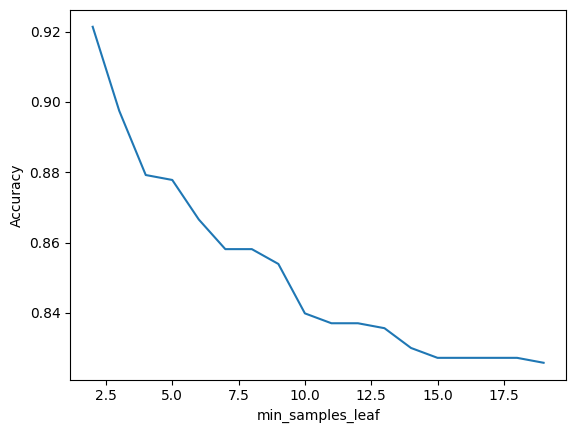

CPU times: user 377 ms, sys: 195 ms, total: 573 ms
Wall time: 268 ms


In [22]:
%%time
################ Explore min_samples_leaf ################

leaf_range = range(2, 20)
accuracy = [ ]

for l in leaf_range:
    m = tree.DecisionTreeClassifier(min_samples_leaf=l, random_state=0)
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    accuracy.append(score)
    
plt.plot(depth_range, accuracy, "-")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.show()

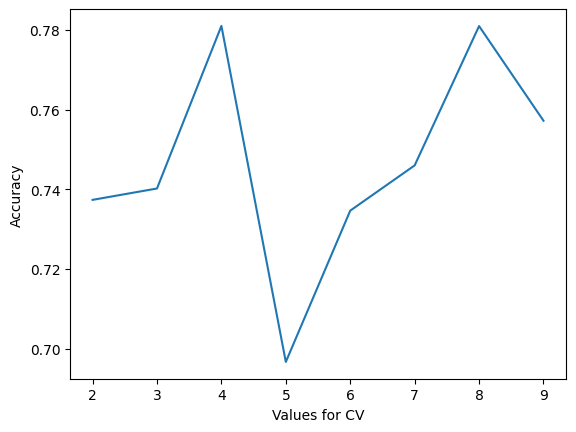

CPU times: user 26.2 s, sys: 0 ns, total: 26.2 s
Wall time: 25.9 s


In [23]:
%%time
################ Explore CV ################

cv_range = range(2, 10)
accuracy_cv = [ ]
params_cv = best_params
m = tree.DecisionTreeClassifier()

for i in cv_range:
    g = GridSearchCV(m, params_cv, cv = i)
    g = grid_obj.fit(X_train, y_train)
    accuracy_cv.append(g.cv_results_['mean_test_score'][0])
    
plt.plot(cv_range, accuracy_cv, "-")
plt.xlabel("Values for CV")
plt.ylabel("Accuracy")
plt.show()

**8 - Report feature importance using “feature_importances_” attribute**

In [24]:
imp = model2.feature_importances_ 

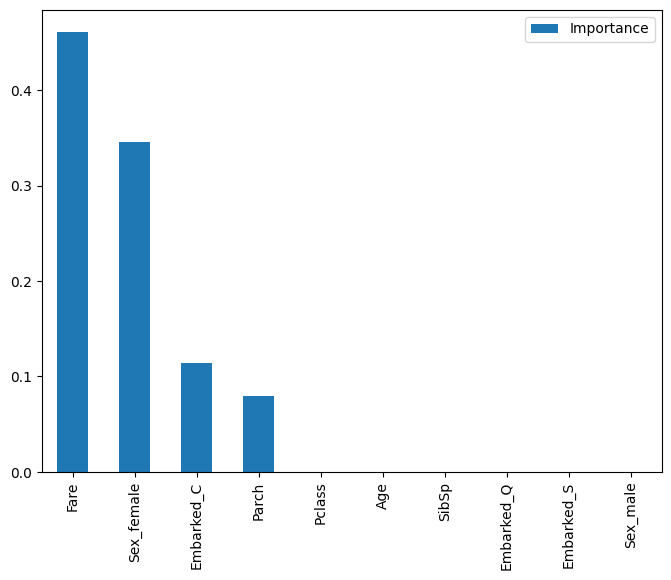

In [25]:
df = pd.DataFrame(imp, index=X_train.columns, columns=["Importance"])
df.sort_values(by='Importance', ascending=False, inplace=True)
df.plot(kind='bar', figsize=(8,6))
plt.show()

**9 - Report the best features according to the decision tree using n_features_ attribute**

In [26]:
model2.n_features_in_

10

In [27]:
print(model2.feature_names_in_)

['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Sex_female' 'Sex_male']


In [28]:
df[ df.Importance > 0 ]

,Importance
Fare,0.460947
Sex_female,0.345832
Embarked_C,0.114212
Parch,0.079009


**10 - Compute your model’s confusion matrix, accuracy, and f1-score.**

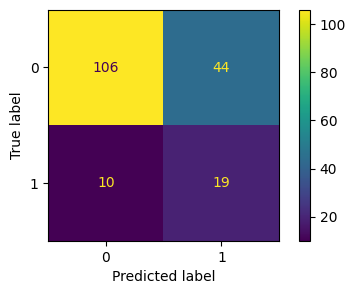

In [29]:
cm = metrics.confusion_matrix(y_pred2, y_test)

fig, ax = plt.subplots(figsize=(5,3))
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = model2.classes_
)
disp.plot(ax=ax)
plt.show()

In [30]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred2)*100:.1f}%")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred2)*100:.1f}%")
print("Confusion Matrix:")
print(cm)

Accuracy: 69.8%
F1 Score: 41.3%
Confusion Matrix:
[[106  44]
 [ 10  19]]
